In [1]:
from pivpy import io, graphics, pivpy
import pkg_resources as pkg
import matplotlib.pyplot as plt


import os

filename = pkg.resource_filename('pivpy','data/openpiv/exp1_001_b.txt')
data = io.load_vec(filename,variables='x,y,u,v')
data = data.piv.vec2scal('vorticity')

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5bd3210210>)

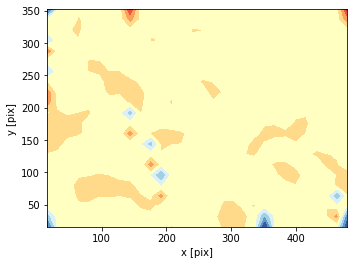

In [2]:
graphics.contour_plot(data.isel(t=0))

In [3]:
data.piv.vec2scal('ke');

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5bc76bb550>)

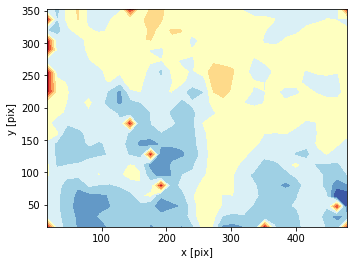

In [4]:
graphics.contour_plot(data.isel(t=0))

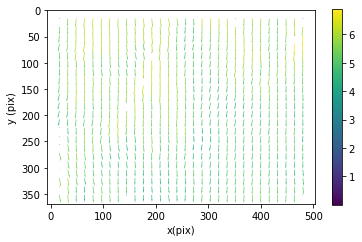

In [5]:
fig,ax = data.piv.quiver(colbar=True)
# fig.set_size_inches(11,10)

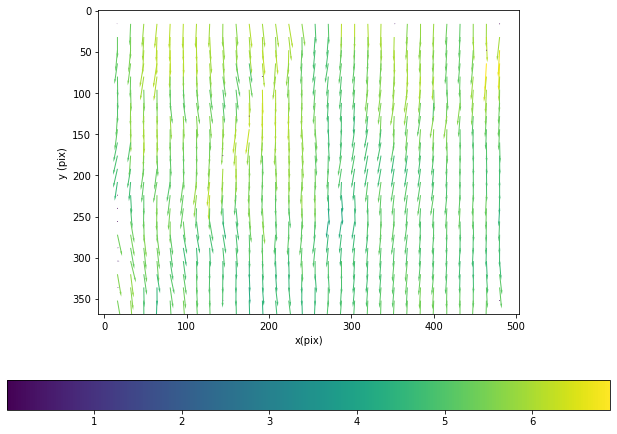

In [21]:
fig,ax = graphics.quiver(data.isel(t=-1),colbar=True,colbar_orient='horizontal',arrScale=15)
fig.set_size_inches(12,8)